In [ ]:
# My First Perceptron

In this exercise you will 

* implement a **multilayer perceptron** (MLP) in keras
* apply the MLP to a linear and a non-linear classification problem
* evaluate the train/validation/test accuracies
* tune hyperparameters with [keras-tuner](https://github.com/keras-team/keras-tuner)

In [1]:
pip --version

pip 21.1.1 from /Users/adrsanchez/opt/anaconda3/lib/python3.8/site-packages/pip (python 3.8)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# uncomment these lines to install the required dependencies.
#!pip install numpy
#!pip install tensorflow-cpu
#!pip install scikit-learn
!pip install matplotlib

     |███████████████                 | 3.4 MB 96 kB/s eta 0:00:400

In [1]:
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np

from sklearn.datasets import make_moons, make_blobs
from sklearn.model_selection import train_test_split

In [2]:
def plot_data_and_model_predictions(X_train, y_train, X_test, y_test, model=None):
    if model:
        # Plot the decision boundary.
        h = .1 # stepsize in mesh
        offset = .1
        offset = .1
        x_min, x_max = np.vstack([X_train,X_test])[:, 0].min() - offset, np.vstack([X_train,X_test])[:, 0].max() + offset
        y_min, y_max = np.vstack([X_train,X_test])[:, 1].min() - offset, np.vstack([X_train,X_test])[:, 1].max() + offset
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z[:,1].reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z)#, cmap=plt.cm.winter, alpha=.6)

    plt.plot(X_train[y_train==0,0],X_train[y_train==0,1],'r.',
         X_test[y_test==0,0],X_test[y_test==0,1],'ro',
         X_train[y_train==1,0],X_train[y_train==1,1],'b.',
         X_test[y_test==1,0],X_test[y_test==1,1],'bo')
    
    plt.xlabel('$X_1$')
    plt.ylabel('$X_2$')
    plt.legend(['Class 0 Train','Class 0 Test' ,'Class 1 Train','Class 1 Test'])
    if model:
        cbar = plt.colorbar()
        cbar.set_label('p(Class 0|x)')
    plt.axis('tight')


## Generating some linear and nonlinear toy data

We use the scikit learn utilities to generatet a linear and a nonlinear toy data set in 2D

In [4]:
n_samples = 100

X_nonlinear, y_nonlinear = make_moons(n_samples=n_samples, noise=.1)
X_linear, y_linear = make_blobs(n_samples=n_samples, n_features=2, centers=2, cluster_std=1.5)

test_size = .2
X_linear_train, X_linear_test, y_linear_train, y_linear_test = \
    train_test_split(X_linear, y_linear, test_size=test_size)

X_nonlinear_train, X_nonlinear_test, y_nonlinear_train, y_nonlinear_test = \
    train_test_split(X_nonlinear, y_nonlinear, test_size=test_size)

## Plotting the linear data

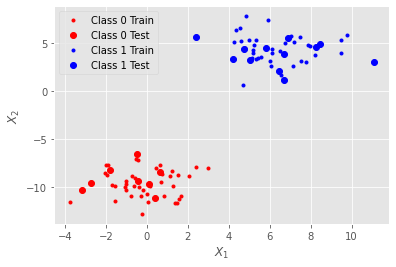

In [7]:
plot_data_and_model_predictions(X_linear_train, y_linear_train,
                                X_linear_test, y_linear_test)

## Plotting the nonlinear data

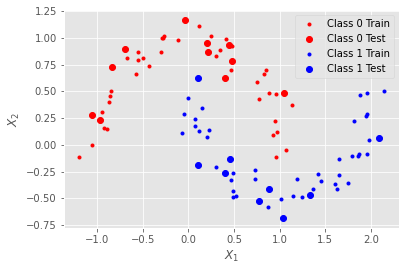

In [8]:
plot_data_and_model_predictions(X_nonlinear_train, y_nonlinear_train,
                                X_nonlinear_test, y_nonlinear_test)

## Building the models

The below two functions should return a compiled keras model that can be trained

In [2]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.losses import SparseCategoricalCrossentropy

def build_linear_model():
    network = models.Sequential()
    model.add(Dense(32, input_dim = 2, activation= 'relu'))
    model.add(Dense(16, activation ='relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics =['accuracy'])
    # INSERT CODE HERE
    return network

def build_nonlinear_model():
    network = models.Sequential()
    # INSERT CODE HERE
    return network

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
conda create -n newenvt anaconda python=3.5


Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /Users/adrsanchez/opt/anaconda3/envs/newenvt

  added / updated specs:
    - anaconda
    - python=3.5


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    alabaster-0.7.10           |   py35hb692fe1_0          15 KB
    anaconda-5.1.0             |           py35_2          11 KB
    anaconda-client-1.6.9      |           py35_0         142 KB
    anaconda-project-0.8.2     |   py35ha24014a_0         462 KB
    appnope-0.1.0              |   py35hd172556_0           8 KB
    appscript-1.0.1            |   py35hdfff33c_1         127 KB
    asn1crypto-0.24.0          |           py35_0         161 KB
    astroid-1.6.1              |           py35_0         394 KB
    astropy-2.0.3              |   py35h1de35cc_0   

## Training the networks on a linear problem

In [ ]:
network_linear = build_linear_model()
network_linear.fit(X_linear_train, y_linear_train, batch_size=16, epochs=100, validation_split=.1, )

network_nonlinear = build_nonlinear_model()
network_nonlinear.fit(X_linear_train, y_linear_train, batch_size=16, epochs=100, validation_split=.1)

## Inspecting the linear network predictions for a linear problem

Let's plot the data on top of the prediction surface of the trained *linear* network.

As the classification problem is linear, the linear perceptron can correctly classify the data.

In [ ]:
plot_data_and_model_predictions(X_linear_train, y_linear_train, 
                                X_linear_test, y_linear_test,
                                network_linear)

## Inspecting the nonlinear network predictions for a linear problem

Also the predictions of the *nonlinear* network classify the data correctly, at a higher computational cost due to the larger number of network parameters.

Also, the nonlinear network is more susceptible to overfitting than the linear one. Play with the size of the training set / test set and increase the noise. Check what happens to the decision boundary of the nonlinear classifier.

In [ ]:
plot_data_and_model_predictions(X_linear_train, y_linear_train, 
                                X_linear_test, y_linear_test,
                                network_nonlinear)

## Training the networks on a nonlinear problem

In [ ]:
network_linear = build_linear_model()
network_linear.fit(X_nonlinear_train, y_nonlinear_train, batch_size=64, epochs=200)

network_nonlinear = build_nonlinear_model()
network_nonlinear.fit(X_nonlinear_train, y_nonlinear_train, batch_size=64, epochs=200)

## Inspecting the linear network predictions for a linear problem

When the classification problem is nonlinear, the *linear* network fails to find a useful decision boundary

In [ ]:
plot_data_and_model_predictions(X_nonlinear_train, y_nonlinear_train, 
                                X_nonlinear_test, y_nonlinear_test,
                                network_linear)

## Inspecting the *nonlinear* network predictions for a linear problem

The *nonlinear* network finds a better decision boundary for nonlinear data

In [ ]:
plot_data_and_model_predictions(X_nonlinear_train, y_nonlinear_train, 
                                X_nonlinear_test, y_nonlinear_test,
                                network_nonlinear)

# Extra Task: Hyperparameter Turning with ``keras-tuner``

How did you decide how many hidden units you'd need for this problem? 
How did you pick the learning rate of the optimizer or the optimizer?

Hyperparameter tuning is important for neural network training, too. 

For ``tensorflow`` there is ``kera-tuner`` that helps you with that. 

In [9]:
!pip install keras-tuner

     |████████████████████████████████| 62 kB 922 kB/s eta 0:00:011
     |████████████████████████████████| 40 kB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 829 kB 4.6 MB/s eta 0:00:01
  Using cached numpy-1.20.2.zip (7.8 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... error
    ERROR: Command errored out with exit status 1:
     command: /Users/adrsanchez/.pyenv/versions/3.9.1/bin/python3.9 /Users/adrsanchez/.pyenv/versions/3.9.1/lib/python3.9/site-packages/pip/_vendor/pep517/_in_process.py prepare_metadata_for_build_wheel /var/folders/f0/htypj9j931n3nyg269zxc6wc0000gn/T/tmpb_rkgm6t
         cwd: /private/var/folders/f0/htypj9j931n3nyg269zxc6wc0000gn/T/pip-install-s5x09ecf/numpy
    Complete output (217 lines):
    Running from numpy source directory.
    setup.py:485: UserWarning: Unrecognized setuptools command, proceeding with generating Cython sources and expanding templates
      run_bu

## Defining a HPO-able Model

The simplest option, from the [``keras-tuner`` quickstart tutorial](https://github.com/keras-team/keras-tuner), is to just define a build model function that takes searchable hyperparameters.

The documentation is not great yet, but it's the best option for simple neural architecture and hyperparameter search.


In [ ]:
from kerastuner.tuners import RandomSearch, Hyperband

def build_model_hpo(hp):
    
    model = models.Sequential()
    # INSERT CODE HERE
    return model


tuner = RandomSearch(
    build_model_hpo,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=5
    )

tuner.search_space_summary()

In [ ]:
tuner.search(X_nonlinear_train, y_nonlinear_train, validation_split=.3)

In [ ]:
best_hps = tuner.get_best_hyperparameters(1)[0]
network_nonlinear_hpo = tuner.hypermodel.build(best_hps)
network_nonlinear_hpo.fit(X_nonlinear_train, y_nonlinear_train, batch_size=16, epochs=100, validation_split=.3)
network_nonlinear_hpo.summary()

In [ ]:
plot_data_and_model_predictions(X_nonlinear_train, y_nonlinear_train, 
                                X_nonlinear_test, y_nonlinear_test,
                                network_nonlinear_hpo)